# WeatherPy
-----------
## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


## Create Plots to Showcase the Relationship Between Weather Variables and Latitude
### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Get a look at the json

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with each city
city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

# Parse the JSON and retrieve data
response = requests.get(city_url)
city_weather = response.json()

city_weather

{'coord': {'lon': -8.7187, 'lat': 70.9221},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': -4.12,
  'feels_like': -11.12,
  'temp_min': -4.12,
  'temp_max': -4.12,
  'pressure': 996,
  'humidity': 89,
  'sea_level': 996,
  'grnd_level': 996},
 'visibility': 832,
 'wind': {'speed': 7.55, 'deg': 72, 'gust': 8},
 'snow': {'1h': 0.12},
 'clouds': {'all': 100},
 'dt': 1730175886,
 'sys': {'country': 'SJ', 'sunrise': 1730192508, 'sunset': 1730216108},
 'timezone': 3600,
 'id': 7535941,
 'name': 'Olonkinbyen',
 'cod': 200}

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city_url))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | http://api.openweathermap.org/data/2.5/weather?q=yellowknife&appid=7d4027d1c90a5eaabe324c34ff1f94b2&units=metric
Processing Record 2 of Set 1 | http://api.openweathermap.org/data/2.5/weather?q=zarumilla&appid=7d4027d1c90a5eaabe324c34ff1f94b2&units=metric
Processing Record 3 of Set 1 | http://api.openweathermap.org/data/2.5/weather?q=badger&appid=7d4027d1c90a5eaabe324c34ff1f94b2&units=metric
Processing Record 4 of Set 1 | http://api.openweathermap.org/data/2.5/weather?q=kismayo&appid=7d4027d1c90a5eaabe324c34ff1f94b2&units=metric
Processing Record 5 of Set 1 | http://api.openweathermap.org/data/2.5/weather?q=waitangi&appid=7d4027d1c90a5eaabe324c34ff1f94b2&units=metric
Processing Record 6 of Set 1 | http://api.openweathermap.org/data/2.5/weather?q=nar'yan-mar&appid=7d4027d1c90a5eaabe324c34ff1f94b2&units=metric
Processing Record 7 of Set 1 | http://api.openweathermap.org/data/2.5/weather?q=longyearby

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-3.71,80,100,6.69,CA,1730175890
1,zarumilla,-3.5031,-80.2731,22.27,82,100,1.70,PE,1730175891
2,badger,64.8000,-147.5333,-5.57,87,100,1.54,US,1730175892
3,kismayo,-0.3582,42.5454,26.16,74,62,3.97,SO,1730175893
4,waitangi,-43.9535,-176.5597,14.34,85,28,1.79,NZ,1730175894


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-3.71,80,100,6.69,CA,1730175890
1,zarumilla,-3.5031,-80.2731,22.27,82,100,1.70,PE,1730175891
2,badger,64.8000,-147.5333,-5.57,87,100,1.54,US,1730175892
3,kismayo,-0.3582,42.5454,26.16,74,62,3.97,SO,1730175893
4,waitangi,-43.9535,-176.5597,14.34,85,28,1.79,NZ,1730175894


### Part 1: Create the Scatter Plots

#### Latitude vs. Temperature

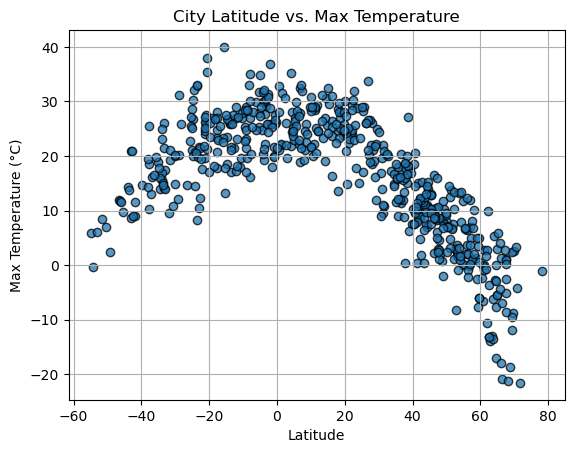

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity

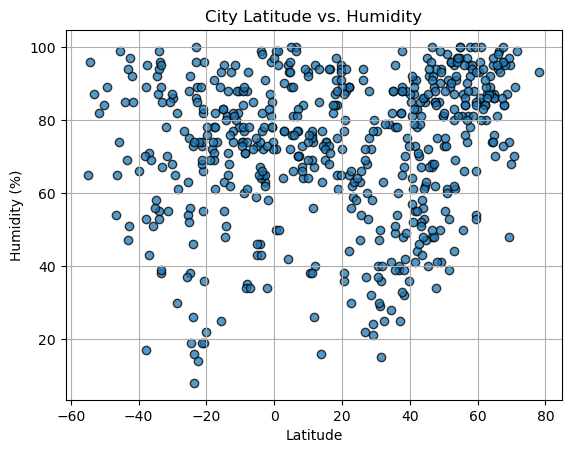

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness

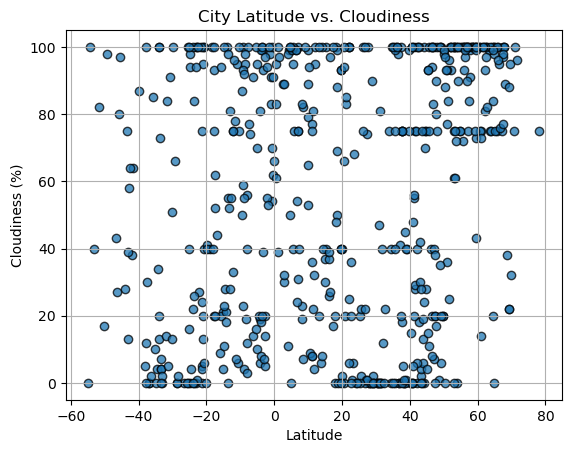

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed

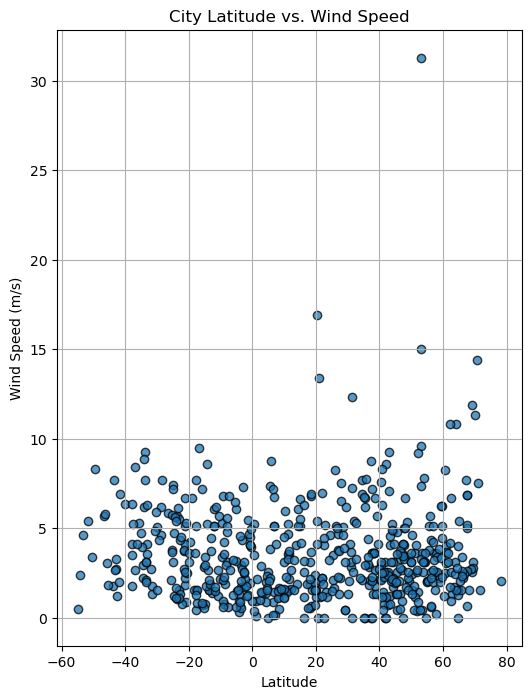

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6, 8))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

### Part 2: Compute Linear Regression for Each Relationship

In [50]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, annotation_coords):

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Plot the scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

    # Annotate the line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", annotation_coords, fontsize=14, color="red")

    # Print the r-squared value
    print(f"The r^2-value is: {r_value**2}")

    # Add labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-3.71,80,100,6.69,CA,1730175890
2,badger,64.8000,-147.5333,-5.57,87,100,1.54,US,1730175892
5,nar'yan-mar,67.6713,53.0870,1.05,84,100,6.85,RU,1730175895
6,longyearbyen,78.2186,15.6401,-1.09,93,75,2.06,SJ,1730175897
7,stanley,54.8680,-1.6985,11.82,97,75,2.06,GB,1730175898


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,zarumilla,-3.5031,-80.2731,22.27,82,100,1.70,PE,1730175891
3,kismayo,-0.3582,42.5454,26.16,74,62,3.97,SO,1730175893
4,waitangi,-43.9535,-176.5597,14.34,85,28,1.79,NZ,1730175894
8,papatowai,-46.5619,169.4708,11.99,54,43,5.70,NZ,1730175899
9,grytviken,-54.2811,-36.5092,-0.31,96,100,2.37,GS,1730175900


####  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.775273805502335


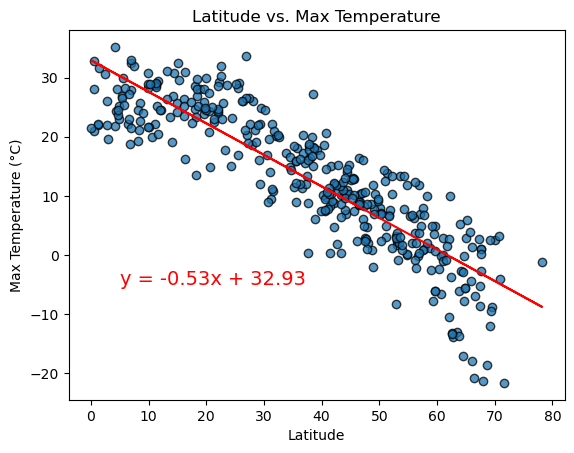

In [53]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude vs. Max Temperature",
    "Latitude",
    "Max Temperature (°C)",
    (5, -5)
)

The r^2-value is: 0.4366384703241358


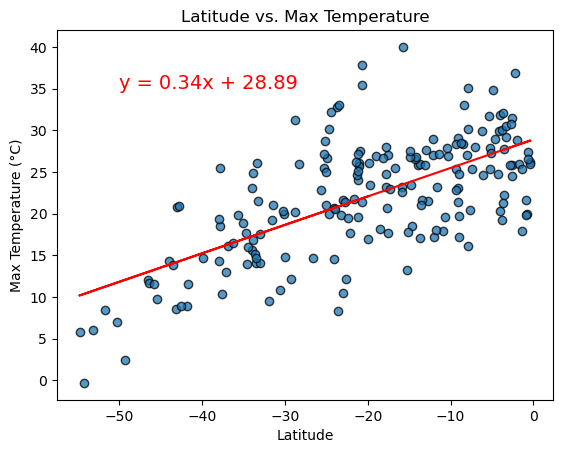

In [55]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude vs. Max Temperature",
    "Latitude",
    "Max Temperature (°C)",
    (-50, 35)
)

**Discussion about the linear relationship:** Moderate correlation between increase in distance from the equator and decrease in temperature, especially in the northern hemisphere, and overall noteable in both hemispheres.

####  Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.03598519060167253


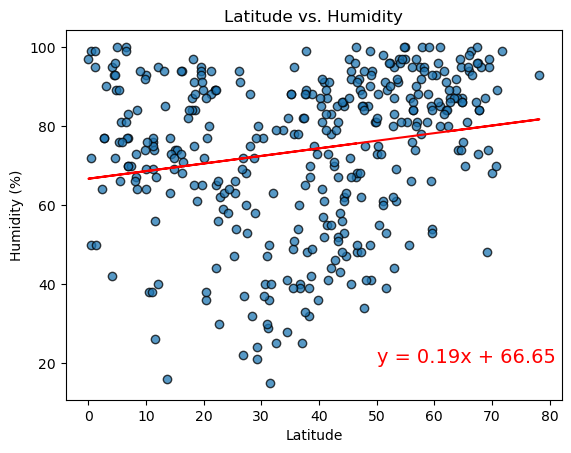

In [60]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude vs. Humidity",
    "Latitude",
    "Humidity (%)",
    (50, 20)
)

The r^2-value is: 2.233045515843771e-05


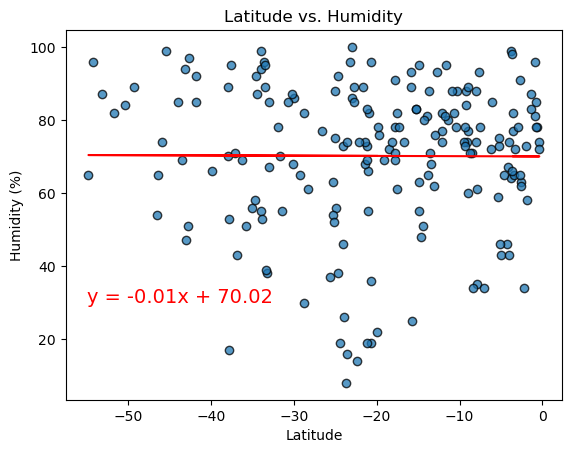

In [61]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude vs. Humidity",
    "Latitude",
    "Humidity (%)",
    (-55, 30)
)

**Discussion about the linear relationship:** Virtually no correlation between latitude and humidity levels noted. Very slight increase in humidity with increase in latitude line noted in northern hemisphere, but very weak correlation.

####  Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.05238520841390389


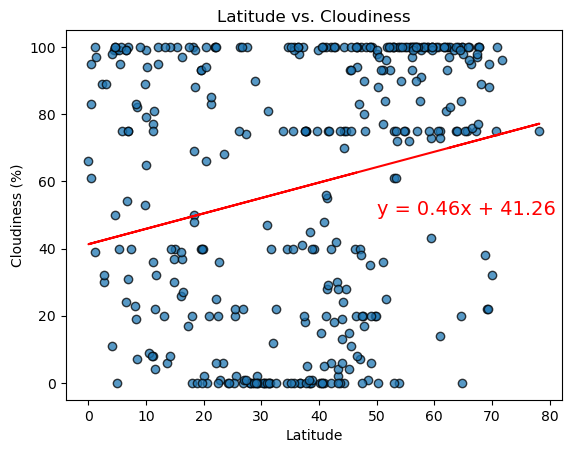

In [63]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude vs. Cloudiness",
    "Latitude",
    "Cloudiness (%)",
    (50, 50)
)

The r^2-value is: 0.03210394958676475


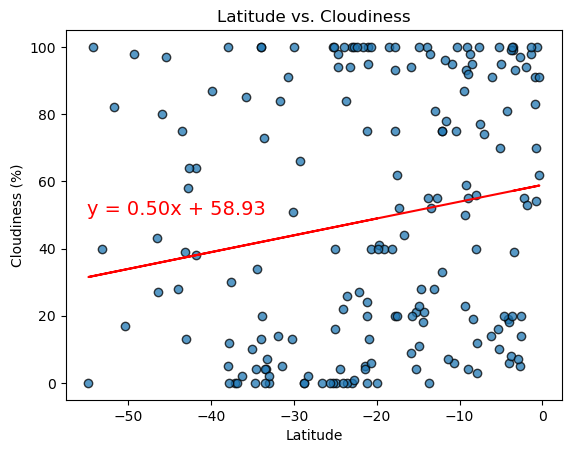

In [66]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Latitude vs. Cloudiness",
    "Latitude",
    "Cloudiness (%)",
    (-55, 50)
)

**Discussion about the linear relationship:** Very weak correlation between latitude and cloudiness. Increase in cloudiness with increase in distance from equator noted in the northern hemisphere; decrease in cloudiness with increase in distance from equator noted in the southern hemisphere; again, both show very week correlation.

####  Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.012761991885681844


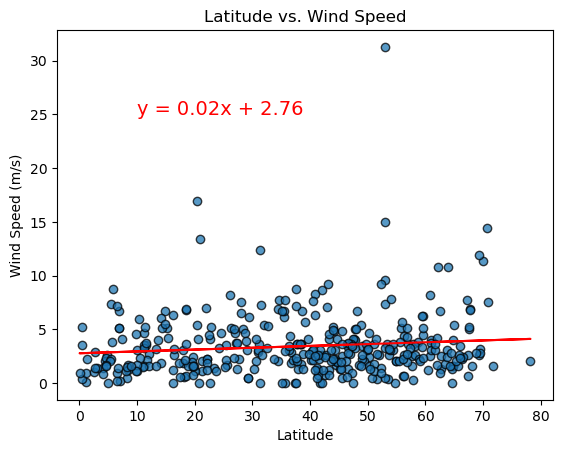

In [68]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude vs. Wind Speed",
    "Latitude",
    "Wind Speed (m/s)",
    (10, 25)
)

The r^2-value is: 0.04791722981272701


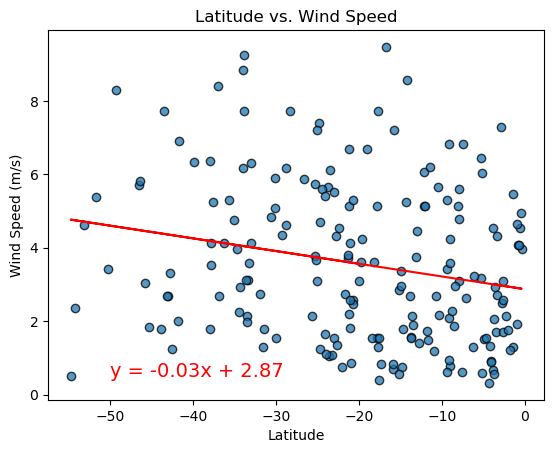

In [70]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Latitude vs. Wind Speed",
    "Latitude",
    "Wind Speed (m/s)",
    (-50, 0.5)
)

**Discussion about the linear relationship:** Virtually no correlation between latitude and wind speed notednoted. Very slight increase in wind speed with increase in distance from equator noted in southern hemisphere, but very weak correlation.